# <center> Prediction of Hepatitis C risk on blood samples by Support Vector Machines </center>

**Author**: A. Fonzino <br>

## <center> Introduction </center>

**Hepatitis C** is an infective disease caused by the hepatitis C virus (**HCV**) that primarily affects the liver. The infection, especially in early stage of pathology, is frequently asymptomatic, and after several years from the infection, causes a chronic affection of liver, impairing its functionality. The infection leads to cicatrization of the liver, fibrosis, cirrhosis, hepatic failure and cancer.<sup>1</sup> HCV is transmitted by the direct contact with infected blood, usually due to endovenous drug use and, in the past, blood transfusions. It's estimated that about 130-170 millions of peoples are infected, globally around the world.<sup>2,3</sup><br>
Thus it's of pivotal importance to perform a strong screening, analysis and diagnosis of each putative blood donor in order to avoid this occurrence.<br>
Because of that Lichtinghagen R., Klawonn F., Hoffmann G. created and donated the HCV dataset a collection of hundreds of blood sample analysis together with some anamnestic information of blood donors.<sup>4</sup>

## <center> Brief introduction to Supervised Machine Learning for Classification Tasks: <br> Support Vector Machines </center>

This kind of problem can be solved with a **Machine Learning** (**ML**) approach, and in particular, it can be seen as a subcategory of ML tasks, that is the **Supervised Learning**. The Supervised ML problems aim to classify data points basing on the assumption that they can be categorized into **classes**.<sup>5</sup> To do that, several ML algorithms have been developed but, in general, these algorithms work in a common manner, using variables of dataset to train the model trying, at the same time, to minimize a **loss-function** calculated between the output of classes predicted by the algorithm and the actual classes to which the data points belong. Thus at least, one of the variables, is used as **response variable** or **label variable**. There are both **binary ML classifiers** where response variable has two levels, and **multi-class ML classifiers** where response variable has more than two levels.<sup>6,7</sup><br>
One of the most used ML algorithm for classification task are **Support Vector Machines** (**SVM**). **SVM** are mathematical models able to perform **linear** and **non linear** classification (and also regression if the response variable is quantitative and not categorical). Furthermore, it is possible, also for SVMs, to perform **binary** and **multi class** classification.
When two classes are linearly separable, numerous **hyperplanes** exist that are able to correctly divide the data. SVMs found good hyperplanes that are able to separate classes and, at the same time, that are able to maximize the gap (or **margin**) among the most extreme instances for each class: these are called **Support Vectors**.<sup>8,9</sup>

Thus, considering 𝐱 a vector with 𝑛 features, 𝐰 as a vector of feature weights and 𝑏 the bias term, the linear SVM classifier compute the prediction for new instance's class by the decision function:

<br>
$$\mathbf{w^{T}x+b = w_{1}x_{1}+w_{2}x_{2}+. . . + w_{n}x_{n} +b} $$
<br>

After this calculation the class is predicted as following: <br>

<br>
$$ \hat{y} = \left\{\begin{matrix}\ 0\ \ if\ \ \mathbf{w^{T}x}+b < 0, \\ 1\ \ if\ \ \mathbf{w^{T}x}+b \geq 0 \end{matrix}\right.$$
<br>

Considering that the slope of the decision function is equal to the norm of the weight vector ||𝐰||, if we divide it by 2, this will double the margin. In other words, to get a larger margin we have to minimize ||𝐰||.
If data are completely linearly separable it is possible to find support vectors that perfectly separate samples into their actual classes. This kind of situation is called SVM with **Hard-Margins**.<sup>8</sup>
In Hard-Margins classification, considering a 𝑡𝑖 equal to -1 and +1 for negative and positive instances, respectively, the constrained form of the optimization problem is:

<br>
$$\mathbf{minimize}_{\mathbf{w},\ b}\ \ \ \frac{1}{2} \mathbf{w^{T}w}$$

$$\mathbf{subject\ to}\ \ \ t^{(i)}(\mathbf{w^{T}x}+b) \geq 1\ \ \ for\ \ \ i=1, 2, ..., m$$
<br>

To note, we are minimizing ½ 𝐰𝐓𝐰 instead of ||𝐰|| because the latter is not differentiable at 𝐰 = 0. On the other hand, if data are not completely linearly separable, or there are too many outliers (Hard Margins SVM are severely affected by outliers in the data) one strategy is to admit some misclassifications using a more flexible model. This is the case of SVM with **Soft-Margins**. With Soft-Margins classification, the objective is to found good hyperplanes that are able to simultaneously, separates the classes, maximize the gap (margin) and limit the margin violations.<sup>8</sup> In Soft Margins classification, the constrained form of the optimization problem is an extension of the Hard Margin version, being it:

<br>
$$\mathbf{minimize}_{\mathbf{w},\ b}\ \ \ \frac{1}{2} \mathbf{w^{T}w} + C \sum_{i=1}^{m}\zeta^{i}$$

$$\mathbf{subject\ to}\ \ \ t^{(i)}(\mathbf{w^{T}x}+b) \geq 1-\zeta^{i}\ \ \  and\ \ \ \zeta^{i}\geq 0\ \ \ for\ \ \ i=1, 2, ..., m$$
<br>

where 𝜁 is a slack variable that must be  ≥  0 for each instance and it is used to measure how much an instance should be allowed to go outside the margin. In this context, 𝐂 is an hyperparameter to be tuned (by **Cross Validation**) that equilibrate between the maximization of margin and minimization of margin violations. It's important to say that, margin violations are not good occurrences, but anyways, they may lead to a better **generalization** capacity of the final classifier on new un-seen data, decreasing the possibility of **overfitting** on training data.<sup>8</sup>
Both Hard and Soft Margin problems are considerable as **Convex Quadratic Optimization Problems with Linear Constraints** and are known as **Quadratic Programming (QP) problems**. Given a constrained optimization problem, it is possible to express it as its **primal form** or, in its **dual form**, that is, simplifying, another different but very closely related problem to the primal. Both of them have, indeed, the identical final solution: from the dual problem can be calculated the solution for the primal problem.<sup>8,10</sup> The dual problem has, with respect the primal one, two main advantages: 1) is usually faster and less computationally demanding (if n° of features < n° of instances) and 2) gives the possibility to realize the **kernel trick**.<sup>8,11,12</sup> But, what is it?
When data are not linear separable it's possible to do a preliminar feature engineering step, adding other additional variables, such as polynomial **transformation** of features. This will project data onto a **higher dimensional space**, where the classes could potentially be, linearly separable. 
The limitations of this strategy is that the more the features are added, the more the model became slow and will tend to over-fit training data, being these more complex models. Anyways, for the mathematical characteristics of this model, on SVMs there is the possibility to apply the so called **kernel trick** that makes possible to do these transformations without actually computing them. There are many types of transformations that are applicable for the kernel trick and that are so able to increase the feature space of the data in a computationally convenient manner. These are, for instance, besides the simple **Linear** kernel, the **Polynomial**, **Sigmoidal** and **Gaussian Radial Basis Function** (**RBF**) kernels.<sup>8,13</sup> Given two vectors a and b, common kernels are calculated as:

*Linear*:        $K(\mathbf{a},\mathbf{b}) = \mathbf{a^{T}b}$ <br>
*Polynomial*:    $K(\mathbf{a},\mathbf{b}) = (\gamma \mathbf{a^{T}b} + r)^d$ <br>
*Gaussian RBF*:  $K(\mathbf{a},\mathbf{b}) = exp(-\gamma||\ \mathbf{a-b}\ ||\ )$ <br>
*Sigmoid*:       $K(\mathbf{a},\mathbf{b}) = tanh\ (\gamma\ \mathbf{a^{T}b} + r) $ <br>

## <center> Description of the HCV Dataset </center>

**Source:**
*Downloaded from UCI Machine Learning Repository* at url: https://archive.ics.uci.edu/ml/datasets/HCV+data <br>
**Creators:** Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann <br>
**Donor:** Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; *lichtinghagen.ralf '@' mh-hannover.de* <br>
**Donor:** Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; *frank.klawonn '@' helmholtz-hzi.de* <br>
**Donor:** Georg Hoffmann; Trillium GmbH; Grafrath, Germany; *georg.hoffmann '@' trillium.de*<br>

Dateset consisted of 615 samples and 13 variables:
1.  **Category** = Factor with 5 levels. Classification in Blood Donor, Cirrhosis, Hepatitis, Fibrosis and suspect Blood Donor.
2.  **Age** = Discrete quantitative variable. Age of the blood donor.
3.  **Sex** = Factor with 2 levels. Sex of the blood donor. 
4.  **ALB**  = Continuous quantitative variable. Measures of the amount of Albumin in the blood.
5.  **ALP**  = Continuous quantitative variable. Measures of the amount of Alkaline Phosphatase in the blood.
6.  **ALT**  = Continuous quantitative variable. Measures of the amount of Alanine Aminotransferase in the blood.
7.  **AST**  = Continuous quantitative variable. Measures of the amount of Aspartate Transaminase in the blood. 
8.  **BIL**  = Continuous quantitative variable. Measures of the amount of Bilirubin in the blood. 
9.  **CHE**  = Continuous quantitative variable. Measures of the amount of Cholinosterase in the blood. 
10. **CHOL** = Continuous quantitative variable. Measures of the amount of Cholesterol in the blood. 
11. **CREA** = Continuous quantitative variable. Measures of the amount of Cretinine in the blood.
12. **GGT**  = Continuous quantitative variable. Measures of the amount of Gamma-Glutamyl Transferase in the blood. 
13. **PROT** = Continuous quantitative variable. Measures of the amount of total amount of Protein in the blood. 


### <center> Aim of the Study </center>

The aim of this work was to build a good Support Vector Machine Classifier (SVM or SVMC or SVC) able to distinguish among blood samples of safe and high risk hepatitis donors. The target attribute for classification was the Category feature converted into a two levels factor, with *Blood Donors* and *Hepatitis* classes (including its progress 'just' Hepatitis C, Fibrosis and Cirrhosis).

### <center> Methods </center>

The procedures followed in this work, were to use the Scikit-learn Python library (sklearn) to pre-process the dataset, eliminate the missing values, encode categorical variables, standardize the dataset and, in the end, to build a SVM classifier using the SVC class of Sklearn, evaluating it. Three paths were followed after the pre-processing and standardization of the data:<br>
The first one was the **Train-test split** approach using default hyper-parameters for SVC object and a linear kernel.
The second path was a 5-Fold **Cross-Validation** (**CV**) by **Grid Search** on the same Train-Test datasets used to tune hyper-parameters, select the best model and evaluate it on unseen data.
The third step consisted of a **Nested Cross-Validation** with 5 folds in the outer loop and 3 folds for the inner loops, performed to tune hyper-parameters by GridSearch and to find **unbiased estimation** of the performances on the unseen data of the outer loop. After that, the final classifier was built on the whole dataset by CV-GridSearch method.
In the end, a brief study about the **Precision-Recall curves** of the final classifier was performed. A copy of the code is attached to this Report as Python, HTML and Jupyter Notebook files.

# Setup
Some preliminar steps. <br>

In [1]:
# Importing basic modules
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import clear_output
import sklearn
import os
import sys

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save figures
PROJECT_ROOT_DIR = "."
folder_name = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, folder_name)
os.makedirs(IMAGES_PATH, exist_ok=True) # exist_ok=True don't rise error if folder already exists, complier will continue further


# function to plot a complete confusion matrix with common metrics.
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    ###############################################################################################
    CITATION: taken from: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
    ###############################################################################################
    
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sn.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# To ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get and visualize the data

In [3]:
# read and visualize the dataset downloaded from the repository
df = pd.read_csv("hcvdat0.csv" ,index_col=0)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
Category    615 non-null object
Age         615 non-null int64
Sex         615 non-null object
ALB         614 non-null float64
ALP         597 non-null float64
ALT         614 non-null float64
AST         615 non-null float64
BIL         615 non-null float64
CHE         615 non-null float64
CHOL        605 non-null float64
CREA        615 non-null float64
GGT         615 non-null float64
PROT        614 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [5]:
# there are 2 categorical variables (Category and Sex), 1 discrete quantitative variable (Age) and 10 countinuos variables.
df.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [6]:
df.Sex.value_counts()

m    377
f    238
Name: Sex, dtype: int64

In [7]:
df.describe()
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


We have some missing values, expecially on ALP variable but may be better to mantain this variable and drop rows with missing values.

In [8]:
# drop NaN values eliminating rows containing them 
df_drop = df.dropna(axis = 0)
df_drop

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [9]:
# visualizing changes after NaN's related rows dropping
df_drop.Category.value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [10]:
# drop suspect blood donor samples because their nature is not certain.
df_drop_suspect = df_drop[df_drop["Category"] == "0s=suspect Blood Donor"]
df_drop = df_drop.drop(df_drop_suspect.index)
df_drop

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [11]:
df_drop.Category.value_counts()

0=Blood Donor    526
3=Cirrhosis       24
1=Hepatitis       20
2=Fibrosis        12
Name: Category, dtype: int64

The task to perform is to classify samples in *normal donors* and *potential risk of Hepatitis C* (Cirrhosis, Hepatitis and Fibrosis). <br>
Thus, there is the need to use the feature "Category" as **response variable** for the classification task. <br>
*0s suspect Blood Donor* patients have been dropped also because they will be analysed by the final classifier to understand which one is really a dangerous one.
# Encoding Categorical Variables

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
category = {"0=Blood Donor" : "Blood Donor",
            "1=Hepatitis": "Hepatitis",
            "2=Fibrosis" : "Hepatitis",
            "3=Cirrhosis" : "Hepatitis"}
cat_encoded = {"Blood Donor": 0, "Hepatitis": 1}

In [14]:
# Transform Category from a 4 levels to a 2 levels factor.
df_drop.Category = df_drop.Category.map(category)
df_drop

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Hepatitis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
610,Hepatitis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
611,Hepatitis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,Hepatitis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [15]:
df_drop.Category.value_counts()

Blood Donor    526
Hepatitis       56
Name: Category, dtype: int64

[]

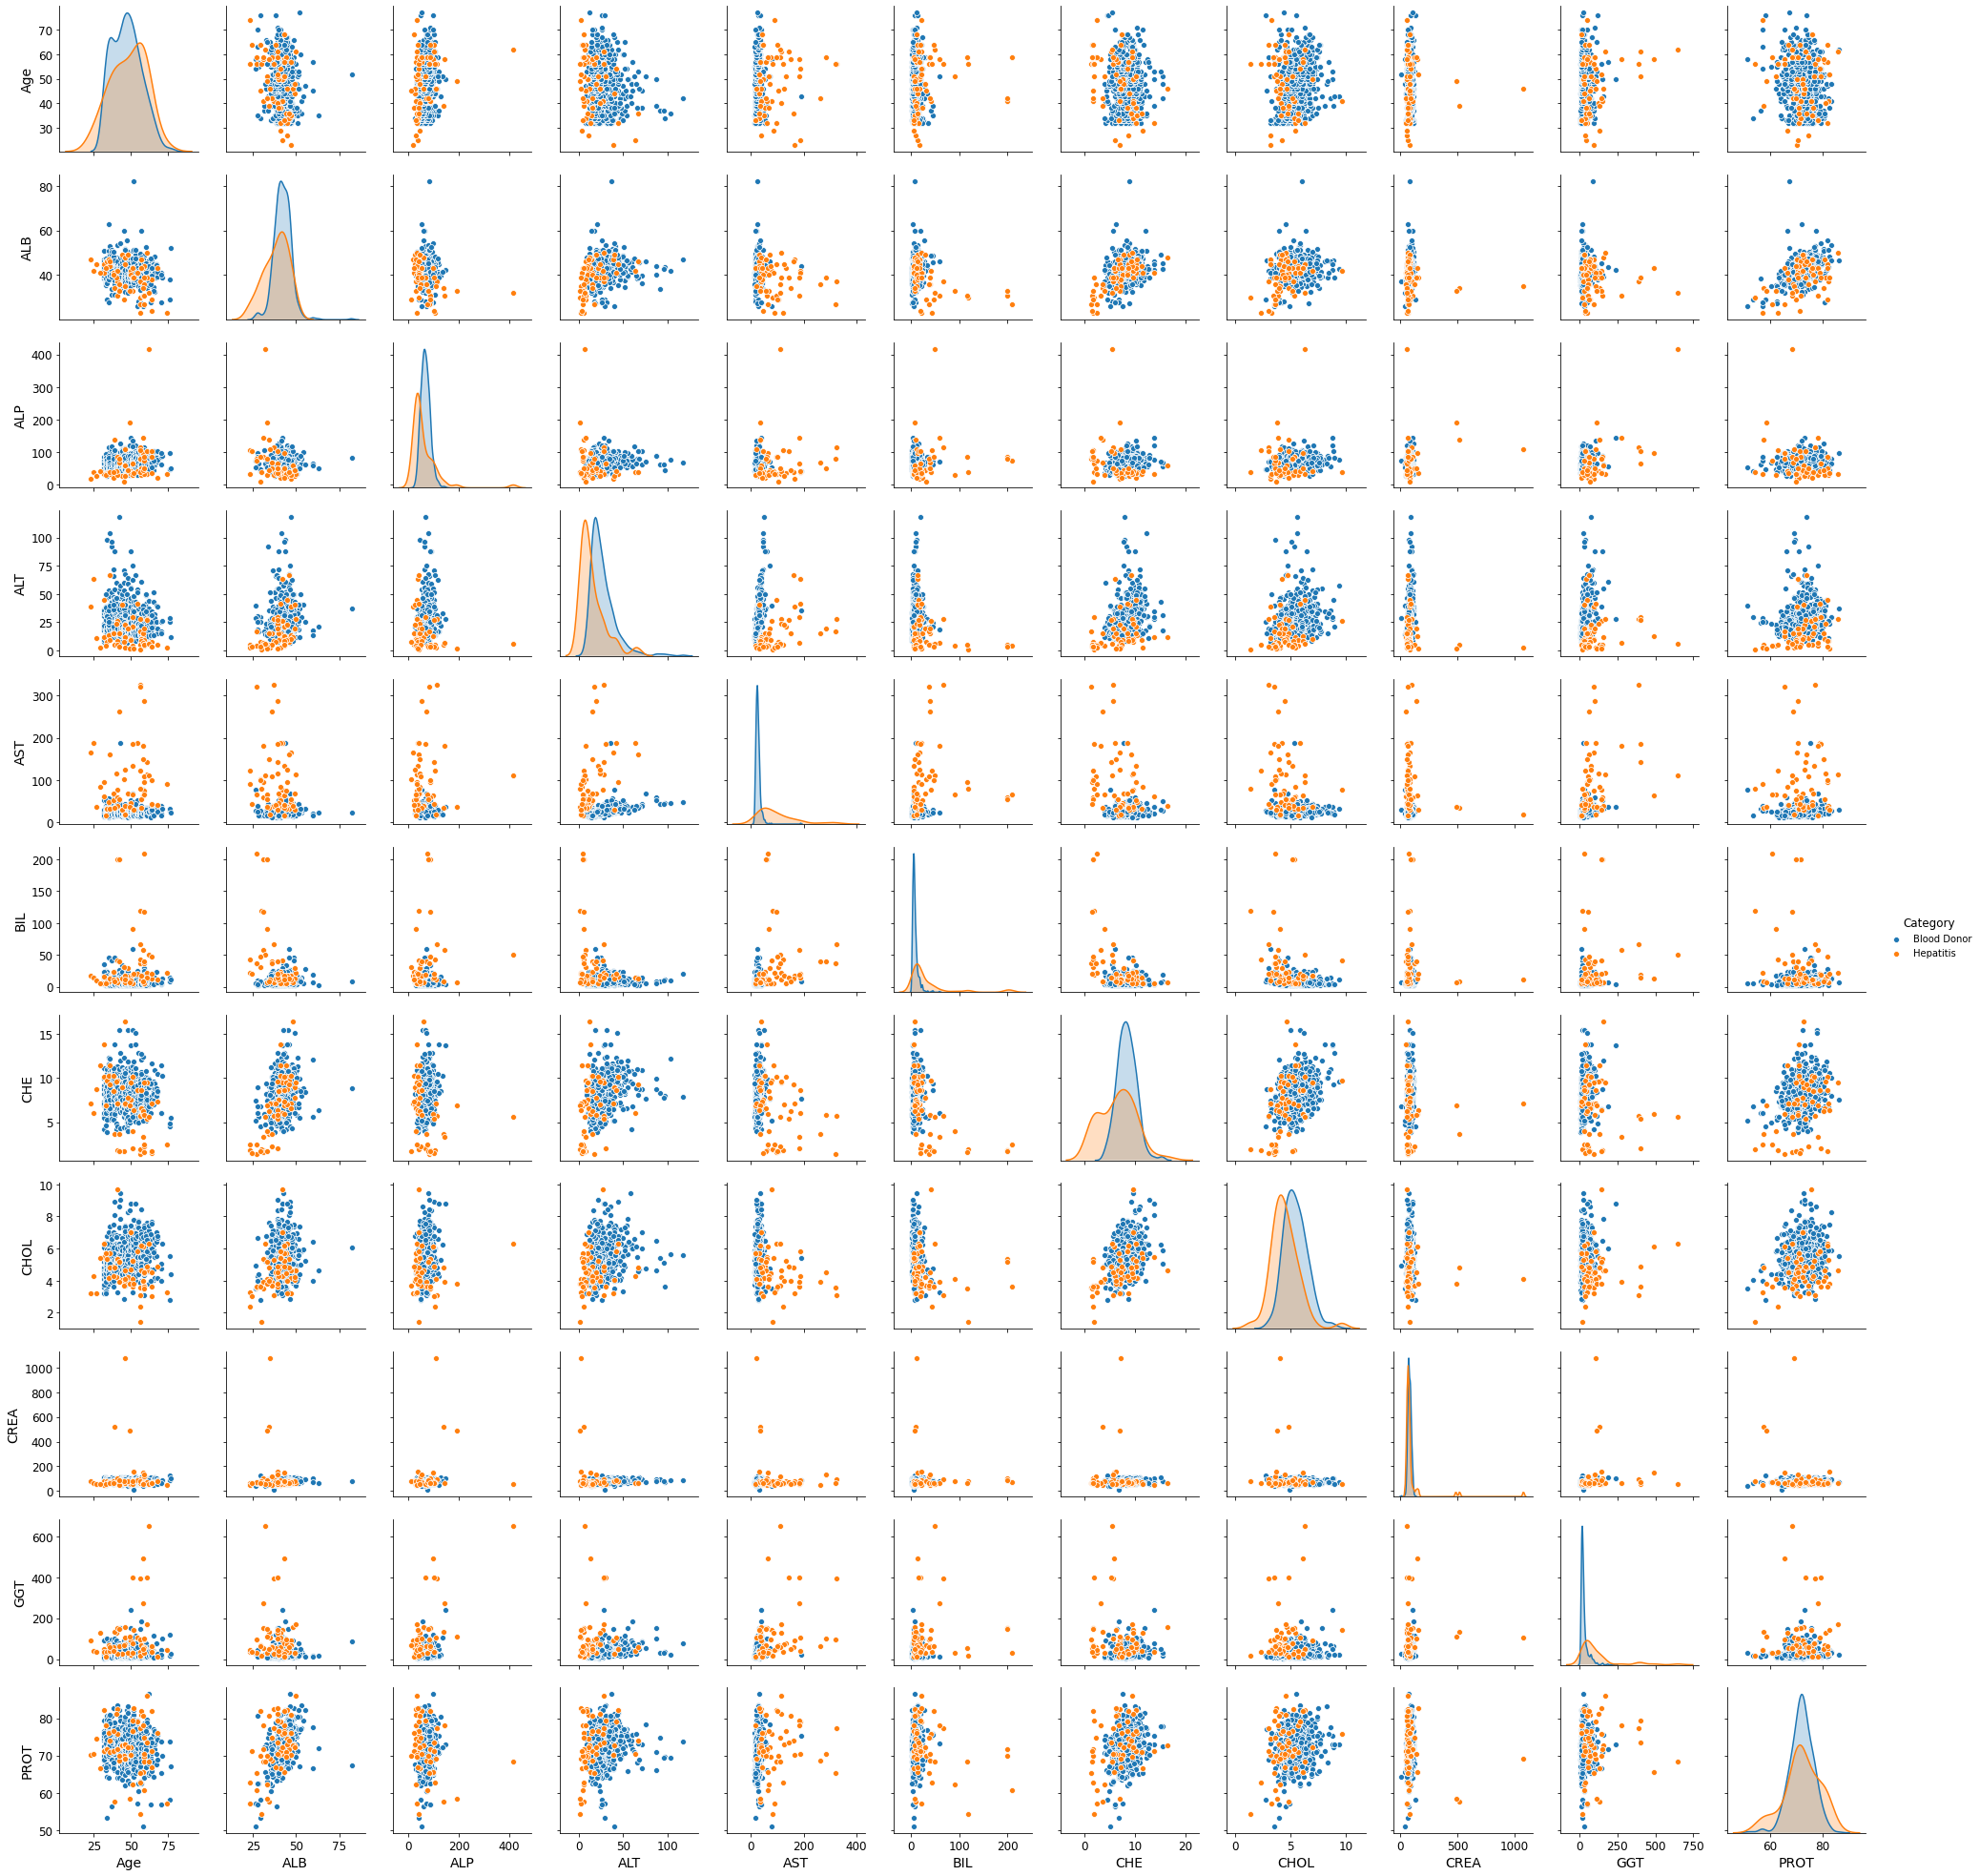

In [16]:
# some visualization of Catergory feature contribution.
sn.pairplot(df_drop, hue = "Category")
plt.savefig("pairplot.png", dpi=600)
plt.plot()

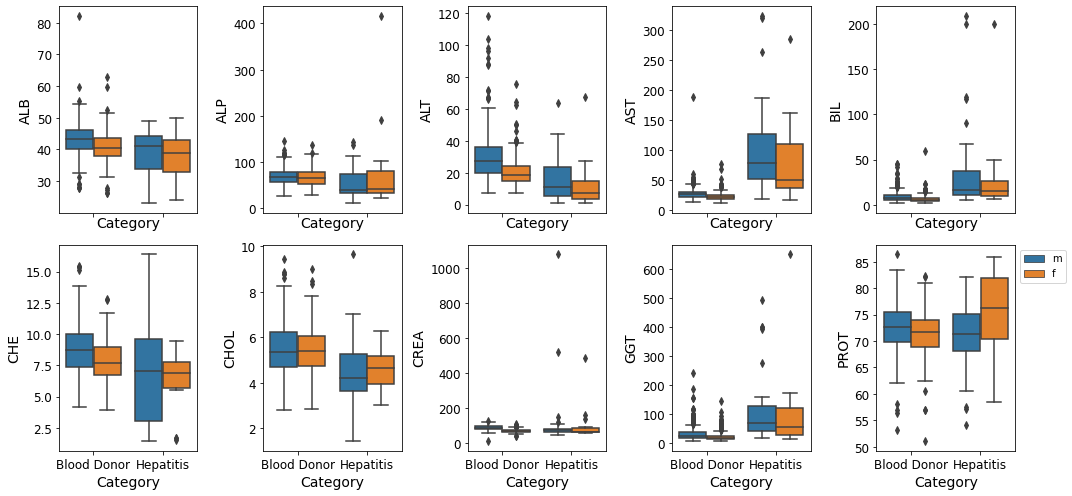

In [17]:
# some visualization of both category and sex contribution with a set of Box-Plots.
f, ax  = plt.subplots(2,5, sharex=True, figsize=(15,7))
row = 0
col = 0
for i in df_drop.columns[3:]:
    a = sn.boxplot(data=df_drop, x="Category", hue="Sex", y=i, ax=ax[row, col])
    a.legend([], frameon=False)
    if col < 4:
        col += 1
    else:
        row += 1
        col = 0
f.tight_layout()
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("box_plot.png", dpi=600)
plt.show()

In [18]:
df_drop.Sex.value_counts()

m    357
f    225
Name: Sex, dtype: int64

In [19]:
# Encoding "Category" feature.
# 0 is Blood Donor and 1 is Hepatitis
oe_cat = OrdinalEncoder()
df_drop.Category = oe_cat.fit_transform(df_drop.Category.values.reshape(-1,1))
df_drop.Category.value_counts()

0.0    526
1.0     56
Name: Category, dtype: int64

In [20]:
# Encoding "Sex" feature.
# 0 is female and 1 is male
oe_sex = OrdinalEncoder()
df_drop.Sex = oe_sex.fit_transform(df_drop.Sex.values.reshape(-1,1))
df_drop.Sex.value_counts()

1.0    357
0.0    225
Name: Sex, dtype: int64

# Create Train and Test sets

In [21]:
# splitting into X and y
X = df_drop.iloc[:,1:]
y = df_drop.iloc[:,0]

Since SVM optimization is made by minimization of the decision vector $\mathbf{w}$, the best hyperplane found is strongly influenced by the scale of the variables and, because of that, it's a good decision to **standardize** each variable before the fit of the SVM model.

In [22]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X_sc.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02
mean,6.791055e-16,-9.766910e-16,-1.141508e-15,1.457406e-16,1.945752e-16,-1.724470e-16,2.411206e-16,1.159821e-16,8.794035e-16,-4.482859e-18,-1.087332e-16,-7.973767e-16
std,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00
min,-2.465197e+00,-1.259630e+00,-3.510279e+00,-2.242654e+00,-1.661303e+00,-6.596185e-01,-5.317349e-01,-3.159505e+00,-3.566231e+00,-1.459892e+00,-6.295233e-01,-4.348516e+00
25%,-8.417235e-01,-1.259630e+00,-5.277958e-01,-6.030045e-01,-6.266291e-01,-3.680884e-01,-3.314976e-01,-5.871851e-01,-6.936017e-01,-2.747400e-01,-4.163438e-01,-5.781902e-01
50%,-2.998684e-02,7.938842e-01,2.209959e-02,-6.574078e-02,-2.124243e-01,-2.389491e-01,-2.256578e-01,2.449668e-02,-8.316804e-02,-9.696727e-02,-2.761710e-01,-1.309805e-03
75%,6.802828e-01,7.938842e-01,6.232564e-01,4.635635e-01,4.080445e-01,-5.335962e-02,-5.396678e-03,6.292011e-01,6.147911e-01,1.400631e-01,-1.237350e-02,6.373792e-01
max,3.014026e+00,7.938842e-01,7.524909e+00,1.388720e+01,6.200205e+00,8.991033e+00,1.132232e+01,3.813202e+00,3.830789e+00,1.969704e+01,1.195488e+01,2.965504e+00


In [23]:
# splitting into train and test sets being aware of their classes composition.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.33, random_state=25)

In [24]:
# % of hepatitis samples in train set
print(round((y_train.value_counts()[1] / y_train.value_counts()[0])*100, 2), "% of Hepatitis samples in train set")

10.83 % of Hepatitis samples in train set


In [25]:
# % of hepatitis samples in test set
print(round((y_test.value_counts()[1] / y_test.value_counts()[0])*100, 2), "% of Hepatitis samples in test set")

10.29 % of Hepatitis samples in test set


In [26]:
# % of hepatitis samples in the entire dataset
print(round((y.value_counts()[1] / y.value_counts()[0])*100, 2), "% of Hepatitis samples in the entire data-set")

10.65 % of Hepatitis samples in the entire data-set


Thus, it have been obtained equilibrated train and test sets with percentage of Hepatitis samples resembling the one of the whole dataset.

# Select and train the model (1st path)
First of all, it was tried to train a Support Vector Machine Classifier (SVC class of Scikit-learn library) with default hyper-parameters settings and with a linear kernel, this to understand rapidly its ability to solve this classification task (C hyperparameter = 0).

In [27]:
from sklearn.svm import SVC

# instantiating Support Vector Machine Classifier object.
svc = SVC(kernel="linear")

In [28]:
# Visualize default parameters.
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
# Fit the model on the training set.
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
# predict train set samples with the fitted model.
y_train_hat = svc.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy on train data: ", round(accuracy_score(y_train, y_train_hat)*100,2), "%")

Accuracy on train data:  99.49 %


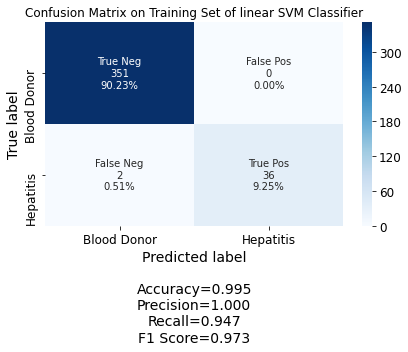

In [32]:
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
categories = ["Blood Donor", "Hepatitis"]

# confusion matrix on training set of linear SVM Classifier
make_confusion_matrix(confusion_matrix(y_train, y_train_hat), 
                      group_names=labels,
                      categories=categories,
                      title = "Confusion Matrix on Training Set of linear SVM Classifier",
                      figsize=(6,5))
plt.tight_layout()
plt.savefig("CM_1.png")

In [33]:
# predict test set samples with the fitted model.
y_test_hat = svc.predict(X_test)

In [34]:
print("Accuracy on test data: ", round(accuracy_score(y_test, y_test_hat)*100,2), "%")

Accuracy on test data:  98.45 %


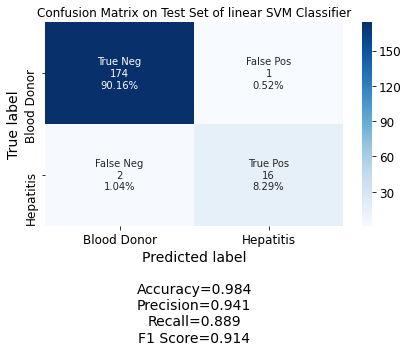

In [35]:
# confusion matrix on test set of linear SVM classifier
make_confusion_matrix(confusion_matrix(y_test, y_test_hat), 
                      group_names=labels,
                      categories=categories,
                      title = "Confusion Matrix on Test Set of linear SVM Classifier",
                      figsize=(6,5))
plt.tight_layout()
plt.savefig("CM_2.png")

In [36]:
pd.DataFrame(svc.coef_, columns=X_train.columns, index=["Feature Importance"]).T.sort_values(by="Feature Importance").to_excel("FeatureImportances.xls")
print("Feature Importances of SVC with linear kernel\n\n", 
      pd.DataFrame(svc.coef_, columns=X_train.columns, index=["Feature Importance"]).T.sort_values(by="Feature Importance"))

Feature Importances of SVC with linear kernel

       Feature Importance
ALT            -1.366866
ALP            -0.719798
ALB            -0.306521
CHOL           -0.148908
Sex            -0.129671
CHE             0.135519
Age             0.195713
PROT            0.331574
BIL             0.382242
CREA            0.448809
GGT             0.543209
AST             1.808927


It seems that, the choise to mantain ALP it has been a good strategy because it has a big impact on the model.

# Fine Tune Hyperparameter by GridSearch and Cross Validation (2nd path)
After checking the feasibility of the problem, it has been performed the tuning of the hyperparameters by 5-Fold Cross-Validation coupled with Grid Search on the training set, and the generalization capacities of the resulting best model have been evaluated on the test set.

In [37]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = [
    {'kernel': ['linear'], 'C': [1, 10, 30, 100, 1000, 3000, 10000, 30000]}, 
    {'kernel': ['rbf'], 
     'C': [1, 10, 30, 100, 1000, 3000, 10000, 30000], 'gamma': [0.0001, 0.0003, 0.001, 0.003 , 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

In [38]:
svc_cv = SVC()
grid_search = GridSearchCV(svc_cv, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 30, 100, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [1, 10, 30, 100, 1000, 3000, 10000, 30000],
                          'gamma': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03,
                                    0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [39]:
# Extracting CV results.
#For each fold (5 folds) extract scores of train and test sets as mean, and standard deviation
# of the 88 combinations of hyper-parameters.
cvOutput_param = pd.DataFrame(grid_search.cv_results_["params"])
cvOutput_param["TrainMean"] = grid_search.cv_results_["mean_train_score"]
cvOutput_param["TrainStd"] = grid_search.cv_results_["std_train_score"]
cvOutput_param["TestMean"] = grid_search.cv_results_["mean_test_score"]
cvOutput_param["TestStd"] = grid_search.cv_results_["std_test_score"]
cvOutput_param

,C,kernel,gamma,TrainMean,TrainStd,TestMean,TestStd
0,1,linear,NaN,0.995503,0.001570,0.987147,0.011465
1,10,linear,NaN,0.996146,0.002402,0.984576,0.009599
2,30,linear,NaN,0.996787,0.002871,0.979434,0.010344
3,100,linear,NaN,0.998073,0.002571,0.974293,0.016111
4,1000,linear,NaN,0.999357,0.001286,0.971722,0.014821
...,...,...,...,...,...,...,...
83,30000,rbf,0.03,1.000000,0.000000,0.992288,0.006278
84,30000,rbf,0.10,1.000000,0.000000,0.979434,0.012922
85,30000,rbf,0.30,1.000000,0.000000,0.904884,0.009589
86,30000,rbf,1.00,1.000000,0.000000,0.902314,0.005507


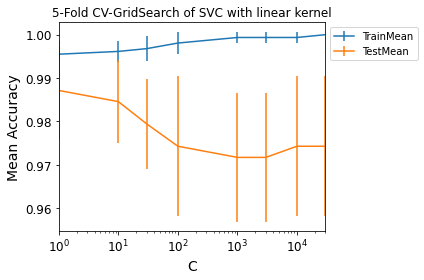

In [40]:
# Train and Validation curves of 5-Fold CV-Grid Search with linear Kernel
f, ax = plt.subplots(1,1)
cvOutput_param[cvOutput_param["kernel"]=="linear"].plot(x="C", y="TrainMean", ax = ax, yerr = "TrainStd", logx = True)
cvOutput_param[cvOutput_param["kernel"]=="linear"].plot(x="C", y="TestMean", ax = ax, yerr = "TestStd", logx = True)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("5-Fold CV-GridSearch of SVC with linear kernel")
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.xticks()
plt.tight_layout()
plt.savefig("LinearSVM_CV.png")
plt.show()

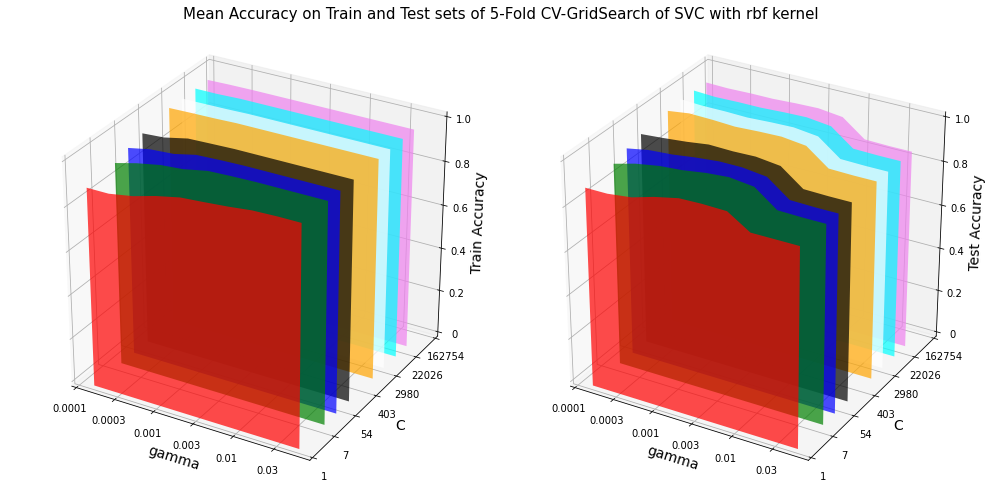

In [41]:
# Create a 3D Visualization for train and validation set curves of the 5-Fold Cross Validation with RBF kernel related results.

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

C_label = list(map(int, (np.array([pow(np.e, i) for i in [0,2,4,6,8,10,12]]))))

# Create Figure
fig = plt.figure(figsize=(14,7))
plt.title("Mean Accuracy on Train and Test sets of 5-Fold CV-GridSearch of SVC with rbf kernel", size = 15)
plt.axis('off')

# First subplot for Train Data
ax = fig.add_subplot(1, 2, 1, projection='3d')

zs = list(np.sort(cvOutput_param[(cvOutput_param["kernel"]=="rbf")]["C"].value_counts().index.values))

verts = []
for e in zs:
    vert = []
    vert.append((np.log(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)[0],0))
    for i in range(len(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)):
        vert.append((np.log(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)[i], 
                      cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["TrainMean"].values[i]))
    vert.append((np.log(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)[i], 0))
    verts.append(vert)

poly = PolyCollection(verts, facecolors=[cc(col) for col in ["r", "g", "b", "black", "orange", "white", "cyan", "violet"]])

poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=np.log(zs), zdir='y')

ax.set_xlabel('gamma')
ax.set_xlim3d(-10, 1.5)
ax.set_ylabel('C')
ax.set_ylim3d(0, 12)
ax.set_zlabel('Train Accuracy')
ax.set_zlim3d(0, 1)
ax.set_xticklabels([0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0], fontsize=10)
ax.set_yticklabels(C_label, fontsize=10)
ax.set_zticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)

# Second Subplot for Test Data
ax = fig.add_subplot(1, 2, 2, projection='3d')

verts = []
for e in zs:
    vert = []
    vert.append((np.log(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)[0],0))
    for i in range(len(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)):
        vert.append((np.log(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)[i], 
                      cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["TestMean"].values[i]))
    vert.append((np.log(cvOutput_param[(cvOutput_param["kernel"]=="rbf") & (cvOutput_param["C"]== e)]["gamma"].values)[i], 0))
    verts.append(vert)

poly = PolyCollection(verts, facecolors=[cc(col) for col in ["r", "g", "b", "black", "orange", "white", "cyan", "violet"]])

poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=np.log(zs), zdir='y')

ax.set_xlabel('gamma')
ax.set_xlim3d(-10, 1.5)
ax.set_ylabel('C')
ax.set_ylim3d(0, 12)
ax.set_zlabel('Test Accuracy')
ax.set_zlim3d(0, 1)
ax.set_xticklabels([0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0], fontsize=10)
ax.set_yticklabels(C_label, fontsize=10)
ax.set_zticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
plt.tight_layout()
plt.savefig("3dRBF_CV.png")
plt.show()

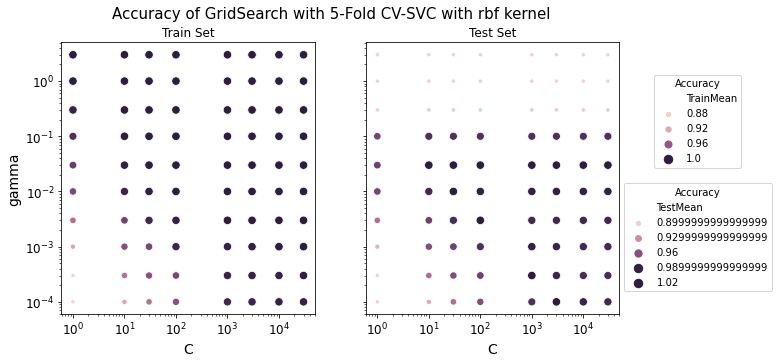

In [42]:
# 2D visualization of the above representation.
%matplotlib inline
f, ax = plt.subplots(1,2, figsize=(10,5), sharey = True)
sn.scatterplot(cvOutput_param[(cvOutput_param["kernel"]=="rbf")]["C"], 
                    cvOutput_param[(cvOutput_param["kernel"]=="rbf")]["gamma"], 
                    data = cvOutput_param[(cvOutput_param["kernel"]=="rbf")],
                    size = "TrainMean",
                    hue = "TrainMean", 
                    ax = ax[0])
ax[0].set(xscale= "log", yscale = "log")
ax[0].legend(bbox_to_anchor=(2.7, 0.9), title = "Accuracy")
ax[0].set_title("Train Set")

sn.scatterplot(cvOutput_param[(cvOutput_param["kernel"]=="rbf")]["C"], 
                    cvOutput_param[(cvOutput_param["kernel"]=="rbf")]["gamma"], 
                    data = cvOutput_param[(cvOutput_param["kernel"]=="rbf")],
                    size = "TestMean",
                    hue = "TestMean", 
                    ax = ax[1], 
                    legend = "brief")
ax[1].set(xscale= "log", yscale = "log")
ax[1].legend(bbox_to_anchor=(1, 0.5), title = "Accuracy")
ax[1].set_title("Test Set")

f.suptitle("Accuracy of GridSearch with 5-Fold CV-SVC with rbf kernel", size= 15)
plt.savefig("2dRBF_CV.png", bbox_inches='tight')
plt.show()

In [43]:
cvOutput_param["TrainMean"].max()

1.0

In [44]:
cvOutput_param["TestMean"].max()

0.9922879177377892

In [45]:
# We can obtain it by GridSearchCV.best_score_ method.
grid_search.best_score_

0.9922879177377892

In [46]:
# Visualize the best estimator hyperparameters.
grid_search.best_params_

{'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}

In [47]:
# Visualize the best estimator.
grid_search.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
# Now this hyper-parameters can be used to train a SVC to the whole training dataset.
final_svc = SVC(C=grid_search.best_params_['C'], gamma = grid_search.best_params_['gamma'], 
                kernel = grid_search.best_params_['kernel'])
final_svc

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
# fitting the final SVC with best C and gamma on the whole training set.
final_svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
# predicting training instances class.
y_train_hat_final = final_svc.predict(X_train)

In [51]:
print("Accuracy on train data: ", round(accuracy_score(y_train, y_train_hat_final)*100, 2), "%")

Accuracy on train data:  99.74 %


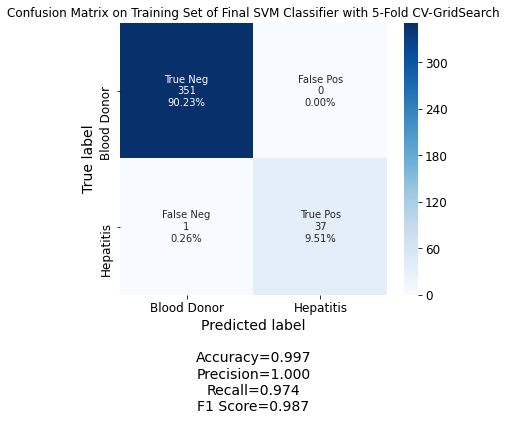

In [52]:
# Confusion Matrix and metrics of the best model found by 5-Fold CV-GridSearch evaluated on the Train Set
make_confusion_matrix(confusion_matrix(y_train, y_train_hat_final), 
                      group_names=labels,
                      categories=categories,
                      title = "Confusion Matrix on Training Set of Final SVM Classifier with 5-Fold CV-GridSearch",
                      figsize=(6,5))
plt.savefig("CM_3.png", bbox_inches='tight')

In [53]:
# predicting test instances class.
y_test_hat_final = final_svc.predict(X_test)

In [54]:
print("Accuracy on test data: ", round(accuracy_score(y_test, y_test_hat_final)*100,2), "%")

Accuracy on test data:  99.48 %


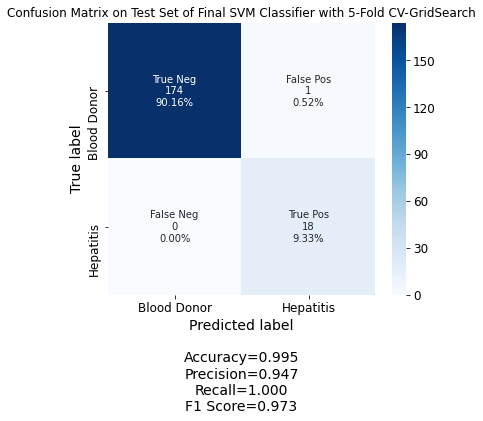

In [55]:
# Confusion Matrix and metrics of the best model found by 5-Fold CV-GridSearch evaluated on the Test Set
make_confusion_matrix(confusion_matrix(y_test, y_test_hat_final), 
                      group_names=labels,
                      categories=categories,
                      title = "Confusion Matrix on Test Set of Final SVM Classifier with 5-Fold CV-GridSearch",
                      figsize=(6,5))
plt.savefig("CM_4.png", bbox_inches='tight')

In [56]:
# ROC AUC for the first classifier (with linear kernel and without tuning of hyperparameters)
sklearn.metrics.roc_auc_score(y_test, y_test_hat)

0.9415873015873015

In [57]:
# ROC AUC for the final Cross-Validated Classifier with best parameters found by Grid Search.
sklearn.metrics.roc_auc_score(y_test, y_test_hat_final)

0.9971428571428572

Now it has been tried to detect the suspected donor samples in order to understand if, among these, there is a real safe blood donor.

In [58]:
# Try to do prediction on df_drop_suspect
df_drop_suspect

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
534,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
535,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
536,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
537,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
538,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
539,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
540,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [59]:
# drop response variable "CATEGORY".
X_suspect = df_drop_suspect.iloc[:,1:]

# Encoding Sex variable.
X_suspect.Sex = oe_sex.transform(X_suspect.Sex.values.reshape(-1,1))
X_suspect

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
534,47,1.0,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
535,48,1.0,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
536,49,1.0,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
537,55,1.0,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
538,71,1.0,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
539,74,1.0,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
540,59,0.0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [60]:
# After standardization, do predictions of suspected donors samples.
y_hat_suspect = pd.Series(final_svc.predict(sc.transform(X_suspect)))
y_hat_suspect.map({0: "Blood Donor", 1:"Hepatitis"})

0      Hepatitis
1    Blood Donor
2    Blood Donor
3      Hepatitis
4      Hepatitis
5      Hepatitis
6      Hepatitis
dtype: object

# Nested Cross Validation and Grid Search (3rd path)
In order to avoid bias problems during the tuning of the hyper-parameters and to also avoid the bias due to splitting procedures into training and test sets, a Nested Cross Validation was performed here for a SVM classifier and, an unbiased estimation of model performance was retrieved. Also in this case, it was used the same hyper-parameters parameters as grid list (dictionary) with Gaussian RBF kernel. The procedure gave back performances showed in the table below.

In [61]:
# the whole Standardized dataset.
X_sc

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.551993,0.793884,-0.620998,-0.603004,-1.205174,-0.347210,-0.205634,-0.596488,-1.950377,0.475856,-0.481563,-0.639999
1,-1.551993,0.793884,-0.620998,0.105388,-0.514274,-0.266787,-0.411593,1.375778,-0.540993,-0.156225,-0.413424,0.905217
2,-1.551993,0.793884,0.944805,0.280496,0.706540,0.596203,-0.285729,0.291962,-0.181915,0.080805,-0.070779,1.482097
3,-1.551993,0.793884,0.255106,-0.622903,0.330905,-0.331744,0.446568,-0.410425,-0.594855,-0.037710,-0.059098,0.740394
4,-1.551993,0.793884,-0.490515,0.256617,0.465061,-0.263694,-0.085492,0.436161,-0.971888,-0.116720,-0.135025,-0.701807
...,...,...,...,...,...,...,...,...,...,...,...,...
577,1.086151,-1.259630,-1.459822,-0.845768,-0.715507,3.608939,-0.177029,-0.908144,-1.277105,-0.511770,0.250451,1.749934
578,1.187618,-1.259630,-0.527796,-0.650761,-0.406950,7.809447,1.653713,-1.136071,-0.801325,1.070407,1.251129,-0.330956
579,1.492019,-1.259630,-1.832632,13.887197,-1.325914,2.380955,2.225820,-1.229102,0.805552,-0.517696,11.954881,-0.743013
580,1.694954,-1.259630,-3.323874,1.398800,-1.527147,0.342565,0.509499,-3.103686,-2.138893,-0.373503,-0.018214,-0.166133


In [62]:
y

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    1.0
Name: Category, Length: 582, dtype: float64

In [63]:
param_grid_ncv = {'kernel': ['rbf'], 
                  'C': [1, 10, 30, 100, 1000, 3000, 10000, 30000],
                  'gamma': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

# Set the outer Cross-Validation instance
# I setted shuffle true because samples are not previoulsy shuffled thus some fold 
# could be made only by "Blood Donor" instances.
outerCV = KFold(n_splits=5, random_state=1, shuffle=True)

# Array where to store outer cross validation scores
outerScores = np.array([])
outerROC = np.array([])
outerPrecision = np.array([])
outerRecall = np.array([])
outerF1score = np.array([])
outerBestParam = np.array([])
outerConfMatr = []

counter = 1
for trainOuter, testOuter in outerCV.split(X_sc.values):    
    # setting for the current outer fold, Xtrain, Xtest, ytrain and ytest 
    current_X_Outer_TrainingSet = X_sc.values[trainOuter]
    current_X_Outer_TestSet = X_sc.values[testOuter]
    current_y_Outer_TrainingSet = y.values[trainOuter]
    current_y_Outer_TestSet = y.values[testOuter]
    
    # set the inner Cross-Validation instance
    print(f"Setting the inner Cross-Validation and SVC instances for the Outer Fold n° {counter}\n")
    innerCV = KFold(n_splits=3, shuffle=True, random_state=1)
    
    # set the SVM classifier instance with rbf kernel
    svmModel = SVC(kernel="rbf", decision_function_shape ='ovr', class_weight = 'balanced')
    
    # Inner Cross-Validation is performed by the by the GridSearch function
    gridSearch = GridSearchCV(svmModel, 
                              param_grid_ncv, 
                              scoring='accuracy',
                              cv=innerCV, verbose=1, refit=True)
    
    # GridSearch on current outer fold
    print(f"executing GridSearch on the current outer fold n° {counter}")
    searchResult = gridSearch.fit(current_X_Outer_TrainingSet,
                                  current_y_Outer_TrainingSet)
    
    # Given that refit=True, gridSearch.fit returns the best
    # hyperParameter over the all current_X_Outer_TrainingSet
    best_model = searchResult.best_estimator_
    
    bestHyperParameterC = gridSearch.best_params_['C']
    bestHyperParameterGamma = gridSearch.best_params_['gamma']
    
    # We can now evaluate current model 
    # on the hold out dataset current_X_Outer_TestSet using different metrics.
    current_y_Predictions = best_model.predict(current_X_Outer_TestSet)
    
    # Compute metrics and saving best parameters for the current outer fold
    currentScore = accuracy_score(current_y_Outer_TestSet, current_y_Predictions)
    currentROC = sklearn.metrics.roc_auc_score(current_y_Outer_TestSet, current_y_Predictions)
    currentPrecision = sklearn.metrics.precision_score(current_y_Outer_TestSet, current_y_Predictions)
    currentRecall = sklearn.metrics.recall_score(current_y_Outer_TestSet, current_y_Predictions)
    currentF1score = sklearn.metrics.f1_score(current_y_Outer_TestSet, current_y_Predictions)
    currentConfMatr = confusion_matrix(current_y_Outer_TestSet, current_y_Predictions)
    currentBestParam = gridSearch.best_params_
    
    # Append to arrays of metrics and best parameters for the currend fold
    outerScores = np.append(outerScores, currentScore)
    outerROC = np.append(outerROC, currentROC)
    outerPrecision = np.append(outerPrecision, currentPrecision)
    outerRecall = np.append(outerRecall, currentRecall)
    outerF1score = np.append(outerF1score, currentF1score)
    outerConfMatr.append(currentConfMatr)
    outerBestParam = np.append(outerBestParam, currentBestParam) 
    
    # Report progress
    print('Accuracy on current fold %.3f = %.3f, Best Hyper Parameter C = %.3f Best Hyper Parameter Gamma = %.3f' % (counter, currentScore, bestHyperParameterC,bestHyperParameterGamma))
    counter += 1    
    print("==================================================================================================\n\n")

Setting the inner Cross-Validation and SVC instances for the Outer Fold n° 1

executing GridSearch on the current outer fold n° 1
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on current fold 1.000 = 1.000, Best Hyper Parameter C = 10.000 Best Hyper Parameter Gamma = 0.003


Setting the inner Cross-Validation and SVC instances for the Outer Fold n° 2

executing GridSearch on the current outer fold n° 2
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on current fold 2.000 = 0.983, Best Hyper Parameter C = 1.000 Best Hyper Parameter Gamma = 0.010


Setting the inner Cross-Validation and SVC instances for the Outer Fold n° 3

executing GridSearch on the current outer fold n° 3
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.0s finished
C:\Users\adria\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on current fold 3.000 = 0.991, Best Hyper Parameter C = 1.000 Best Hyper Parameter Gamma = 0.030


Setting the inner Cross-Validation and SVC instances for the Outer Fold n° 4

executing GridSearch on the current outer fold n° 4
Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on current fold 4.000 = 0.983, Best Hyper Parameter C = 1.000 Best Hyper Parameter Gamma = 0.010


Setting the inner Cross-Validation and SVC instances for the Outer Fold n° 5

executing GridSearch on the current outer fold n° 5
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Accuracy on current fold 5.000 = 1.000, Best Hyper Parameter C = 1.000 Best Hyper Parameter Gamma = 0.010




[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.8s finished


In [64]:
# print metrics' means and their standard deviations.
print(f"Accuracy (mean +/- s.d) of the model by nested Cross Validation and Grid Search: \n{round(np.mean(outerScores), 4)} +/- {round(np.std(outerScores), 4)}")
print("")
print(f"ROC AUC (mean +/- s.d) of the model by nested Cross Validation and Grid Search: \n{round(np.mean(outerROC), 4)} +/- {round(np.std(outerROC), 4)}")
print("")
print(f"Precision (mean +/- s.d) of the model by nested Cross Validation and Grid Search: \n{round(np.mean(outerPrecision), 4)} +/- {round(np.std(outerPrecision), 4)}")
print("")
print(f"Recall (mean +/- s.d) of the model by nested Cross Validation and Grid Search: \n{round(np.mean(outerRecall), 4)} +/- {round(np.std(outerRecall), 4)}")
print("")
print(f"F1-score (mean +/- s.d) of the model by nested Cross Validation and Grid Search: \n{round(np.mean(outerF1score), 4)} +/- {round(np.std(outerF1score), 4)}")

Accuracy (mean +/- s.d) of the model by nested Cross Validation and Grid Search: 
0.9914 +/- 0.0077

ROC AUC (mean +/- s.d) of the model by nested Cross Validation and Grid Search: 
0.9666 +/- 0.0395

Precision (mean +/- s.d) of the model by nested Cross Validation and Grid Search: 
0.9857 +/- 0.0286

Recall (mean +/- s.d) of the model by nested Cross Validation and Grid Search: 
0.9351 +/- 0.0805

F1-score (mean +/- s.d) of the model by nested Cross Validation and Grid Search: 
0.9572 +/- 0.0403


In [65]:
# Print Confusion matrices for each fold.
for i in outerConfMatr:
    print(pd.DataFrame(i, index = [np.array(["Actual", "Actual"]), np.array(["Donor", "Hepatitis"])],
                       columns=[np.array(["Predicted", "Predicted"]), np.array(["Donor", "Hepatitis"])]), "\n")

                 Predicted          
                     Donor Hepatitis
Actual Donor           107         0
       Hepatitis         0        10 

                 Predicted          
                     Donor Hepatitis
Actual Donor           103         0
       Hepatitis         2        12 

                 Predicted          
                     Donor Hepatitis
Actual Donor           102         1
       Hepatitis         0        13 

                 Predicted          
                     Donor Hepatitis
Actual Donor           105         0
       Hepatitis         2         9 

                 Predicted          
                     Donor Hepatitis
Actual Donor           108         0
       Hepatitis         0         8 



It's quite good but, if compared with the train-test approach, the latter overestimated several metrics like **Recall**.
In general, the model evaluated with the nested CV had good performance in terms of Accuracy and Precision, but it pivotal to improve the **Recall** that is calculated by the formula: <br>

$$ Recall = \frac{TP}{TP + FN} $$

Unfortunately, we can't have both high Precision and Recall: one can improve Recall shifting the threshold of the decision function to lower values (than 0), but this will decrease precision beacause of the phenomena of **Precision/Recall Trade-off**.
Anyways the choise of the treshold depends on the task. In this case, it's better to be sure that False Negative are really close to zero even if, at the same time, we have more false positive. It's not a good idea to mark an infected sample as a good one.<br> After the performance evaluation done by Nested CV and before the threshold choice, the next subsequent step is to build the final classifier using CV-GridSearch on the whole dataset.
# Build the final classifier evaluated previously by Nested Cross Validation

In [66]:
# set final Cross-Validation instance
Final_CV = KFold(n_splits=5, shuffle=True, random_state=1)

# set the SVM classifier instance with rbf kernel
Final_svmModel = SVC(kernel="rbf", decision_function_shape ='ovr', class_weight = 'balanced')
    
# Cross-Validation is performed by the by the GridSearch function
Final_gridSearch = GridSearchCV(Final_svmModel, 
                          param_grid_ncv, 
                          scoring='accuracy',
                          cv=Final_CV, verbose=1, refit=True)

# GridSearch
Final_searchResult = Final_gridSearch.fit(X_sc, y)
    
# Given that refit=True, FinalgridSearch.fit returns the best
# hyperParameters over the all DataSet
Final_best_model = Final_searchResult.best_estimator_
    
Final_bestHyperParameterC = Final_gridSearch.best_params_['C']
Final_bestHyperParameterGamma = Final_gridSearch.best_params_['gamma']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    6.3s finished


In [67]:
print("Final best estimator of Nester CV:", Final_searchResult.best_estimator_, "\n")
print("Final best estimated C:", Final_bestHyperParameterC)
print("Final best estimated gamma:", Final_bestHyperParameterGamma)

Final best estimator of Nester CV: SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

Final best estimated C: 1
Final best estimated gamma: 0.03


In [68]:
# Fit the final model with the final hyperparameters on the whole standardized dataset.
netCVclass = SVC(C=1, gamma=0.03, kernel = "rbf")
netCVclass.fit(X_sc, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Precision Recall analysis

In [69]:
# calculate predicted class from decision function output.
threshold_ = 0

In [70]:
netCVclass.predict(X_sc.values[577].reshape(1, -1))

array([1.])

In [71]:
y.values[577]

1.0

In [72]:
netCVclass.decision_function(X_sc.values[577].reshape(1, -1))

array([1.53542412])

In [73]:
netCVclass.decision_function(X_sc.values[577].reshape(1, -1)) > threshold_

array([ True])

It's a sample labelled as 1 (Hepatitis) and predicted correctly with threshold = 0

In [74]:
# predict decision function for all the samples using the best classifier found by Nested Cross Validation
y_scores = netCVclass.decision_function(X_sc)
pd.Series(y_scores)

0     -1.000399
1     -1.214450
2     -1.192047
3     -1.300902
4     -1.809665
         ...   
577    1.535424
578    1.235313
579    1.000250
580    0.326582
581    1.103403
Length: 582, dtype: float64

In [75]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

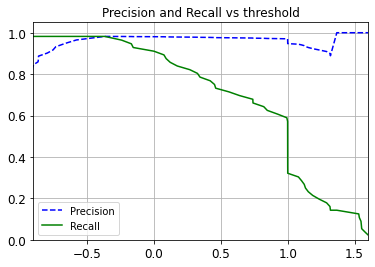

In [76]:
# plot precision-recall vs threshold curves.
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend(loc="best")
plt.grid()
plt.title("Precision and Recall vs threshold")
plt.xlim([-0.9, 1.6])
plt.ylim([0, 1.05])
plt.savefig("PrecisionRecall.png")
plt.show()

In [77]:
# perform cross_val_score using decision scores and shuffling samples with default threshold (0)
CV = KFold(n_splits=5, random_state=1, shuffle=True)

accuracyCV = []
precisionCV = []
recallCV = []

thresholdCV = 0

for trainCV, testCV in CV.split(X_sc.values):
    X_train_cv = X_sc.values[trainCV]
    y_train_cv = y.values[trainCV]
    X_test_cv = X_sc.values[testCV]
    y_test_cv = y.values[testCV]
    
    currentCVclass = SVC(C=1, gamma=0.03, kernel = "rbf")
    currentCVclass.fit(X_train_cv, y_train_cv)
    y_hat_cv_scores = currentCVclass.decision_function(X_test_cv)
    y_hat_cv = pd.Series(y_hat_cv_scores >= thresholdCV).map({False:0, True:1})
    y_hat_cv
    current_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_hat_cv)
    accuracyCV.append(current_accuracy)
    current_precision = sklearn.metrics.precision_score(y_test_cv, y_hat_cv)
    precisionCV.append(current_precision)
    current_recall = sklearn.metrics.recall_score(y_test_cv, y_hat_cv)
    recallCV.append(current_recall)
    
print("Accuracy scores:", accuracyCV, "\nMean +/- std: ", round(np.mean(accuracyCV), 4), "+/-", round(np.std(accuracyCV), 4))
print("\nPrecision scores:", precisionCV, "\nMean +/- std: ", round(np.mean(precisionCV), 4), "+/-", round(np.std(precisionCV), 4))
print("\nRecall scores:", recallCV, "\nMean +/- std: ", round(np.mean(recallCV), 4), "+/-", round(np.std(recallCV), 4))

Accuracy scores: [0.9658119658119658, 0.9914529914529915, 0.9827586206896551, 0.9741379310344828, 0.9827586206896551] 
Mean +/- std:  0.9794 +/- 0.0087

Precision scores: [1.0, 1.0, 0.9230769230769231, 1.0, 1.0] 
Mean +/- std:  0.9846 +/- 0.0308

Recall scores: [0.6, 0.9285714285714286, 0.9230769230769231, 0.7272727272727273, 0.75] 
Mean +/- std:  0.7858 +/- 0.1253


In [78]:
# suppose we want to set Recall to a desired value 98 %
recall_desired = 0.98
# index of thresholds verctor with desired Recall %
index_t = np.argwhere(thresholds == thresholds[np.argmax(recalls[:-1] < recall_desired)])[0][0] - 1
index_t

12

In [79]:
print(f"With a threshold that leads to Recall of {recall_desired} we have a Precision of about {round(precisions[:-1][index_t], 2)}.")

With a threshold that leads to Recall of 0.98 we have a Precision of about 0.98.


In [80]:
threshold_ok = thresholds[index_t]
threshold_ok

-0.3653434311388797

In [81]:
# calculate predicted classes using the new cut-off value as threshold.
y_hat_98recall = pd.Series(y_scores >= threshold_ok).map({False:0, True:1})
y_hat_98recall

0      0
1      0
2      0
3      0
4      0
      ..
577    1
578    1
579    1
580    1
581    1
Length: 582, dtype: int64

In [82]:
# perform cross_val_score using decision scores and shuffling of samples with threshold found above to improve Recall.
CV = KFold(n_splits=5, random_state=1, shuffle=True)

accuracyCV = []
precisionCV = []
recallCV = []

thresholdCV = threshold_ok

for trainCV, testCV in CV.split(X_sc.values):
    X_train_cv = X_sc.values[trainCV]
    y_train_cv = y.values[trainCV]
    X_test_cv = X_sc.values[testCV]
    y_test_cv = y.values[testCV]
    
    currentCVclass = SVC(C=1, gamma=0.03, kernel = "rbf")
    currentCVclass.fit(X_train_cv, y_train_cv)
    y_hat_cv_scores = currentCVclass.decision_function(X_test_cv)
    y_hat_cv = pd.Series(y_hat_cv_scores >= thresholdCV).map({False:0, True:1})
    y_hat_cv
    current_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_hat_cv)
    accuracyCV.append(current_accuracy)
    current_precision = sklearn.metrics.precision_score(y_test_cv, y_hat_cv)
    precisionCV.append(current_precision)
    current_recall = sklearn.metrics.recall_score(y_test_cv, y_hat_cv)
    recallCV.append(current_recall)
print("Accuracy scores:", accuracyCV, "\nMean +/- std: ", round(np.mean(accuracyCV), 4), "+/-", round(np.std(accuracyCV), 4))
print("\nPrecision scores:", precisionCV, "\nMean +/- std: ", round(np.mean(precisionCV), 4), "+/-", round(np.std(precisionCV), 4))
print("\nRecall scores:", recallCV, "\nMean +/- std: ", round(np.mean(recallCV), 4), "+/-", round(np.std(recallCV), 4))

Accuracy scores: [0.9914529914529915, 1.0, 0.9827586206896551, 0.9913793103448276, 0.9827586206896551] 
Mean +/- std:  0.9897 +/- 0.0065

Precision scores: [1.0, 1.0, 0.8666666666666667, 1.0, 0.875] 
Mean +/- std:  0.9483 +/- 0.0633

Recall scores: [0.9, 1.0, 1.0, 0.9090909090909091, 0.875] 
Mean +/- std:  0.9368 +/- 0.0528


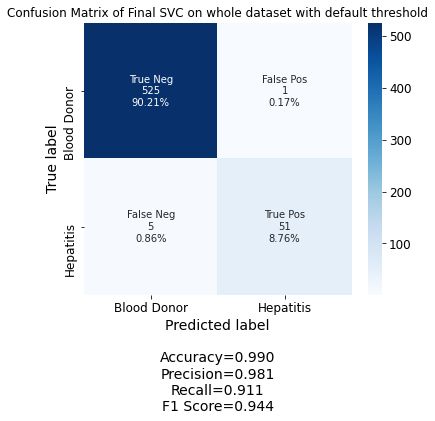

In [83]:
y_hat_ = pd.Series(y_scores >= 0).map({False:0, True:1})
y_hat_
# confusion matrix on whole dataset with default threshold of FinalClassifier with C=1 and gamma=0.03
make_confusion_matrix(confusion_matrix(y, y_hat_), 
                      group_names=labels,
                      categories=categories, 
                      title = "Confusion Matrix of Final SVC on whole dataset with default threshold",
                      figsize=(6,5))
plt.savefig("CM_5.png", bbox_inches='tight')

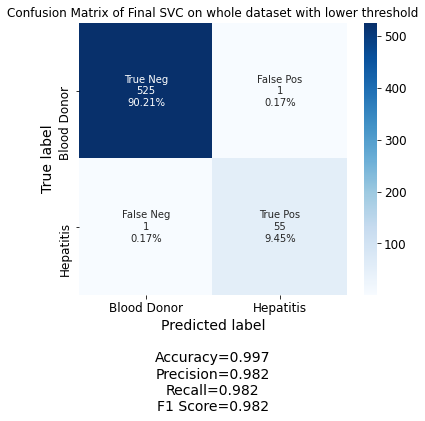

In [84]:
# confusion matrix on whole dataset with threshold to set recall to about 98 % of the FinalClassifier with C=1 and gamma=0.03
make_confusion_matrix(confusion_matrix(y, y_hat_98recall), 
                      group_names=labels,
                      categories=categories, 
                      title = "Confusion Matrix of Final SVC on whole dataset with lower threshold",
                      figsize=(6,5))
plt.savefig("CM_6.png", bbox_inches='tight')

# <center> Conclusions </center>
In the end, three different approaches were used to train the Support Vector Machine Classifiers and for the selection of the model. In the first and second paths, it was used a train-test split approach of the scaled data, maintaining stable the proportion among Blood Donors and Hepatitis classes, with respect the whole dataset. The first attempt was to train directly a Sklearn SVC object with the default hyper-parameters and a linear kernel. The model, even without tuning of hyper-parameters, showed a very good performance on the test set of unseen data. Linear kernel gave also the possibility to visualize features importance. Since, ALP variable has a high weight, when missing values were dropped out, it was a good choice to drop them by rows and not by ALP columns. The final model could have been worse without this variable. 
In the second path it was used the same splitted dataset, to perform tuning of hyper-parameters and selection of the best model through a 5-fold Cross Validation with Grid Search. The best model found on the train set, was retrained and evaluated on the test set. It appeared to be better than the first simpler linear model, increasing its metrics such Accuracy, Precision, Recall, F1-score and Area Under the ROC curve. Bests hyper-parameters were RBF as kernel, C=10 and gamma=0.03.
As said above, this approach has a limitation, that is, it uses, during the Cross Validation on the train set, the same data to tune hyper-parameters and evaluate model performances. This limitation may lead to an optimistically biased evaluation of the model. Furthermore, the train-test split strategy works fairly well, but it is not the best solution since it uses only a limited part of the data-points as test set to evaluate generalization performance. There is the need for an unbiased way to do this, and one solution is the use of the Nested Cross Validation. 
For this reasons, in the third path a Nested Cross Validation was performed trying to fix all the above described limitations. The procedure was applied on the whole scaled dataset. As expected, the nested approach gave back different results for the generalization abilities of the model. A set of 5 different best models were obtained by Grid Search (one for each fold of the outer loop) and, in general, a lower performance on unseen data was found, with respect to previous approaches, excluding however accuracy and precision, that were improved. In particular, the Recall appeared to be worse being 0.935 +/- 0.08 with respect the 0.889 and 1.0 of the first and second steps, respectively. The final classifier was obtained by CV and Grid Search on the whole dataset, and gave back C = 1 and gamma = 0.03.
Because of the lower Recall value, the final model was taken, and its Precion-Recall curves were studied. Decision function scores were computed and a new cut-off fixing the Recall to about 0.98 was found, giving back an approximate Precision of 0.982, on the whole training set.

### <center> Bibliography </center>
1. Ryan KJ, Ray CG (editors) (a cura di), Sherris Medical Microbiology, 4th, McGraw Hill, 2004, pp. 551–2, ISBN 0-8385-8529-9.
2. Houghton M, The long and winding road leading to the identification of the hepatitis C virus, in Journal of Hepatology, vol. 51, n. 5, novembre 2009, pp. 939–48.
3. J McCullough, in Blood and Bone Marrow Pathology (Second Edition), 2011.
4. https://archive.ics.uci.edu/ml/datasets/HCV+data.
5. Bishop, Christopher M., Pattern recognition and machine learning, Springer, 2006
6. Ron Kohavi; Foster Provost (1998). "Glossary of terms". Machine Learning. 30: 271–27
7. Mitchell, T. (1997). Machine Learning. McGraw Hill. p. 2.
8. Aurelien Geron, Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, O'Reilly, 2019.
9. Cortes, Corinna; Vapnik, Vladimir N. (1995). "Support-vector networks". Machine Learning. 20 (3): 273–297.
10. Nocedal, Jorge; Wright, Stephen J. (2006). Numerical Optimization (2nd ed.). Berlin, New York: Springer-Verlag. p. 449.
11. Theodoridis, Sergios (2008). Pattern Recognition. Elsevier B.V. p. 203.
12. Rasmussen, C. E.; Williams, C. K. I. (2006). "Gaussian Processes for Machine Learning".
13. Jean-Philippe Vert, Koji Tsuda, and Bernhard Schölkopf (2004). "A primer on kernel methods". Kernel Methods in Computational Biology.